# 와인 분류 도전!!

## 분석모듈 호출

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import patches
%matplotlib inline

## 데이터 로드

In [60]:
train_data = pd.read_csv('./train.csv')
test_data = pd.read_csv('./test.csv')

데이터 확인

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3231 entries, 0 to 3230
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3231 non-null   int64  
 1   fixed acidity         3231 non-null   float64
 2   volatile acidity      3231 non-null   float64
 3   citric acid           3231 non-null   float64
 4   residual sugar        3231 non-null   float64
 5   chlorides             3231 non-null   float64
 6   free sulfur dioxide   3231 non-null   float64
 7   total sulfur dioxide  3231 non-null   float64
 8   density               3231 non-null   float64
 9   pH                    3231 non-null   float64
 10  sulphates             3231 non-null   float64
 11  alcohol               3231 non-null   float64
 12  type                  3231 non-null   object 
 13  quality               3231 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 353.5+ KB


In [11]:
corr = train_data.corr()

In [17]:
corr_id = corr['id']
corr_id.sort_values()

residual sugar         -0.037193
sulphates              -0.031720
density                -0.021715
chlorides              -0.018822
total sulfur dioxide   -0.012760
quality                -0.011903
pH                     -0.010712
free sulfur dioxide    -0.000888
alcohol                -0.000821
volatile acidity        0.006596
citric acid             0.011222
fixed acidity           0.018970
id                      1.000000
Name: id, dtype: float64

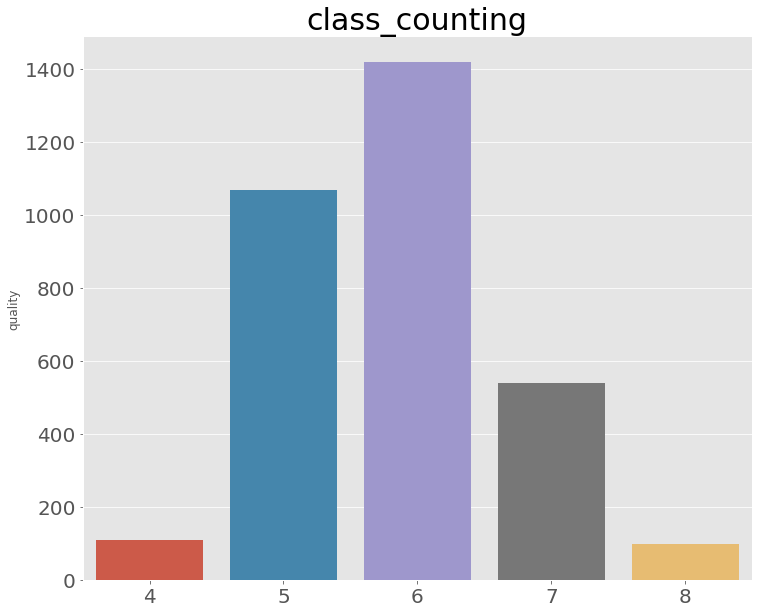

In [28]:
## 클래스별 분포 확인
count_value = train_data['quality'].value_counts()
plt.style.use('ggplot')
plt.figure(figsize=(12,10))
plt.title('class_counting', fontsize=30)
value_bar_ax = sns.barplot(x=count_value.index, y=count_value)
value_bar_ax.tick_params(labelsize=20)

In [30]:
qualities = {}

for i in range(4,9):
    quality_description = train_data[train_data['quality'] == i].drop(['id','quality'], axis = 1).describe()
    if i == 4:
        means = pd.DataFrame({i:quality_description.loc['mean']})
    else:
        mean = pd.DataFrame({i:quality_description.loc['mean']})
        means = pd.concat([means, mean], axis = 1)
means = means.T

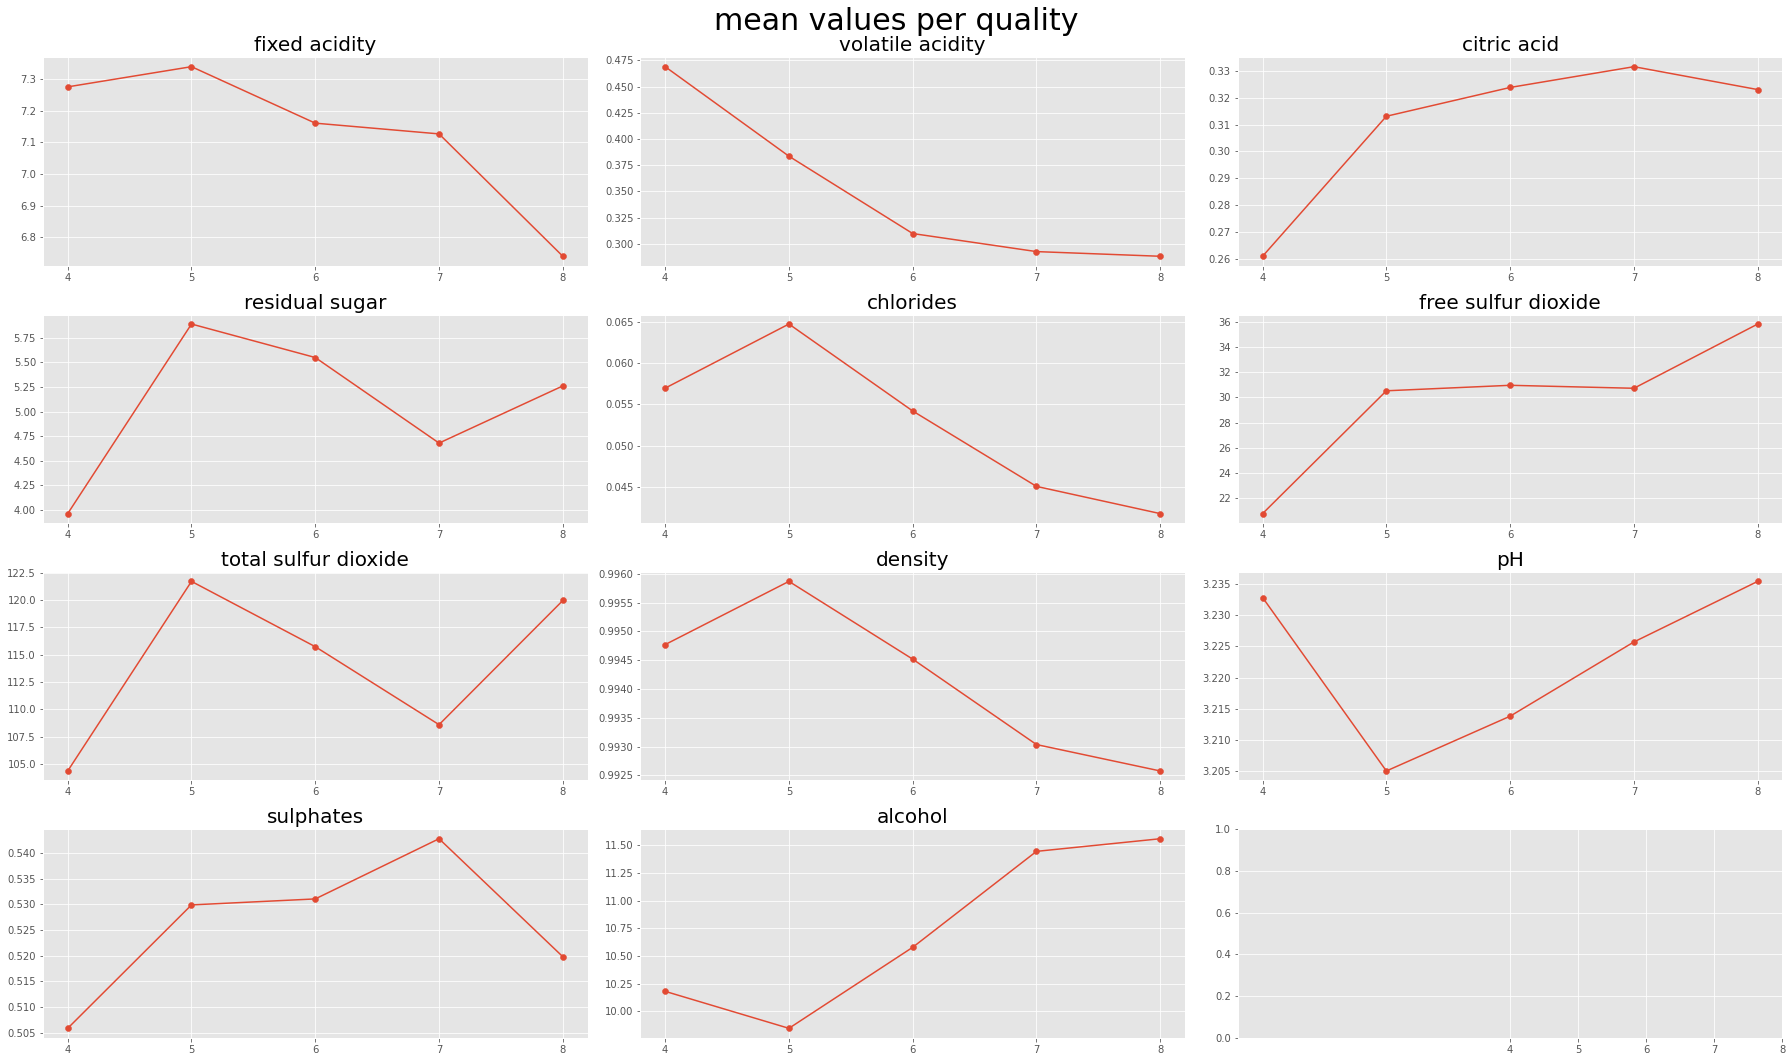

In [31]:
fig, axes = plt.subplots(4,3, figsize = (25,15))

fig.suptitle('mean values per quality', fontsize = 30)

for ax, col in zip(axes.flat, means.columns):
    ax.plot([4,5,6,7,8], means[col])
    ax.scatter([4,5,6,7,8], means[col])
    ax.set_title(col, fontsize = 20)

plt.setp(axes, xticks=[4,5,6,7,8])
plt.tight_layout()
plt.show()

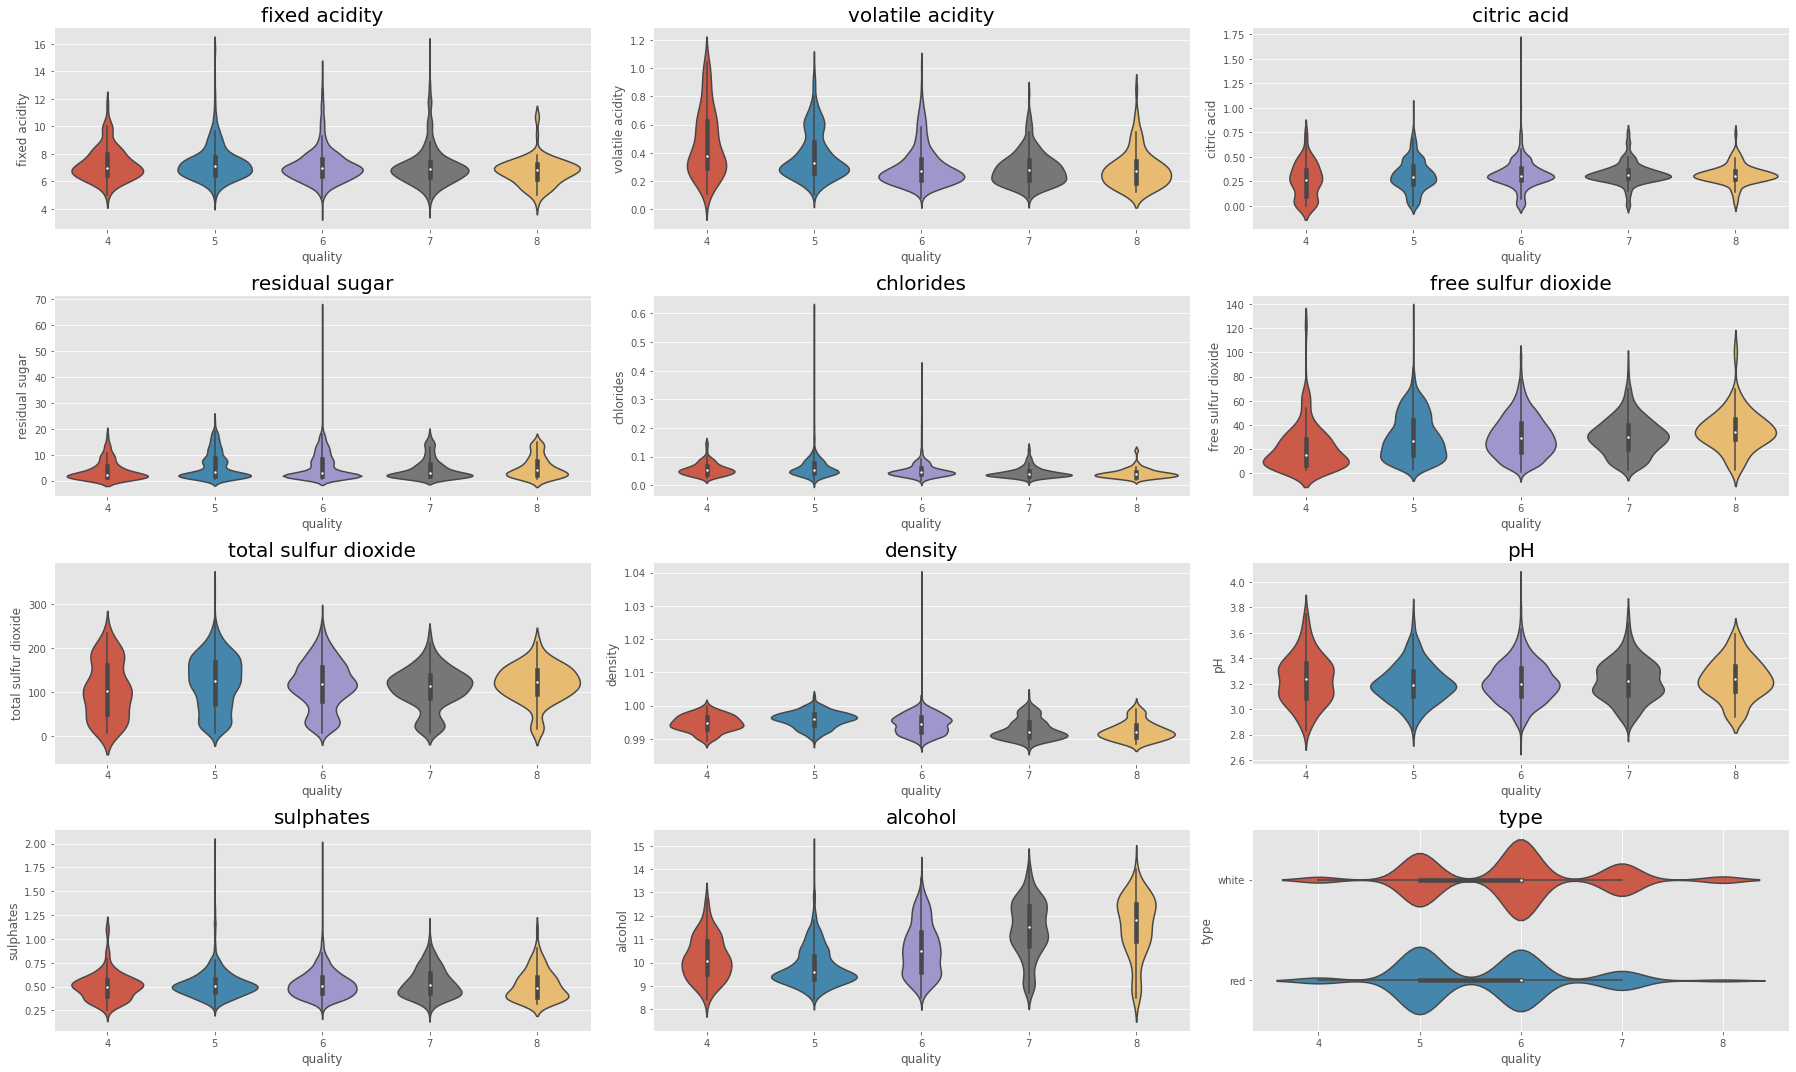

In [33]:
fit, axes = plt.subplots(4,3, figsize = (25,15))

fig.suptitle('feature distributions per quality', fontsize = 40)
for ax, col in zip(axes.flat, train_data.columns[1:]):
    sns.violinplot(x='quality', y=col, ax=ax, data=train_data)
    ax.set_title(col, fontsize=20)
plt.tight_layout()
plt.show()

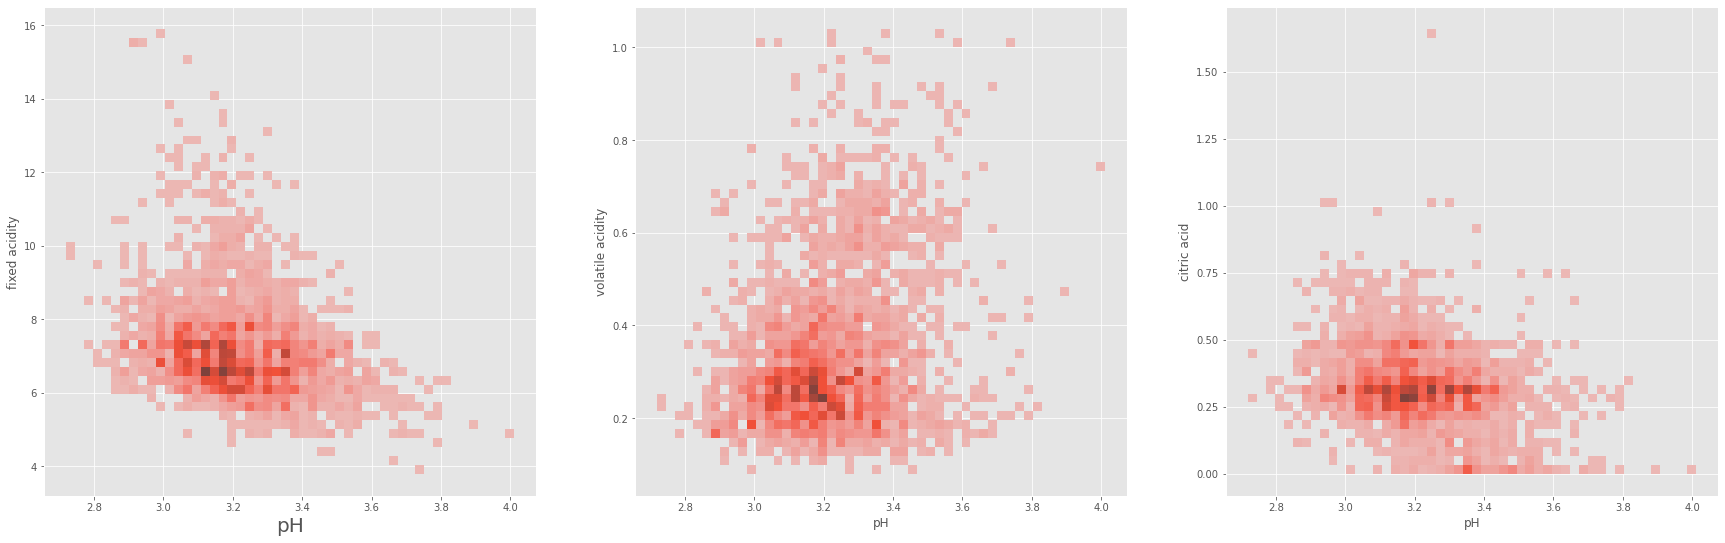

In [36]:
sns.color_palette("Set2")
fit, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(30,9))

scatter_fix = sns.histplot(data=train_data, x="pH", y="fixed acidity", bins = 50, ax=ax1)
scatter_vol = sns.histplot(data=train_data, x="pH", y="volatile acidity", bins = 50, ax=ax2)
scatter_citric = sns.histplot(data=train_data, x="pH", y="citric acid", bins = 50, ax=ax3)
scatter_fix.set_xlabel('pH', fontsize=20)

# ax1.settitle()
fig.suptitle('pH&acid hist plots', fontsize = 30)

plt.show()



In [37]:
plt.figure(figsize=(20,10))

heat_table = train_data.drop(['id'], axis=1).corr()

<Figure size 1440x720 with 0 Axes>

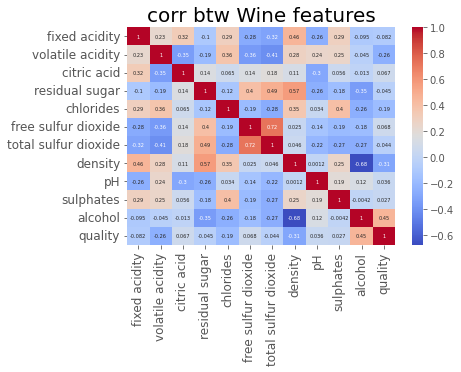

In [50]:
heatmap_ax = sns.heatmap(heat_table, annot=True, annot_kws={'size' : 5}, cmap='coolwarm')
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize = 12, rotation = 90)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize = 12)

plt.title('corr btw Wine features', fontsize = 20)
plt.show()

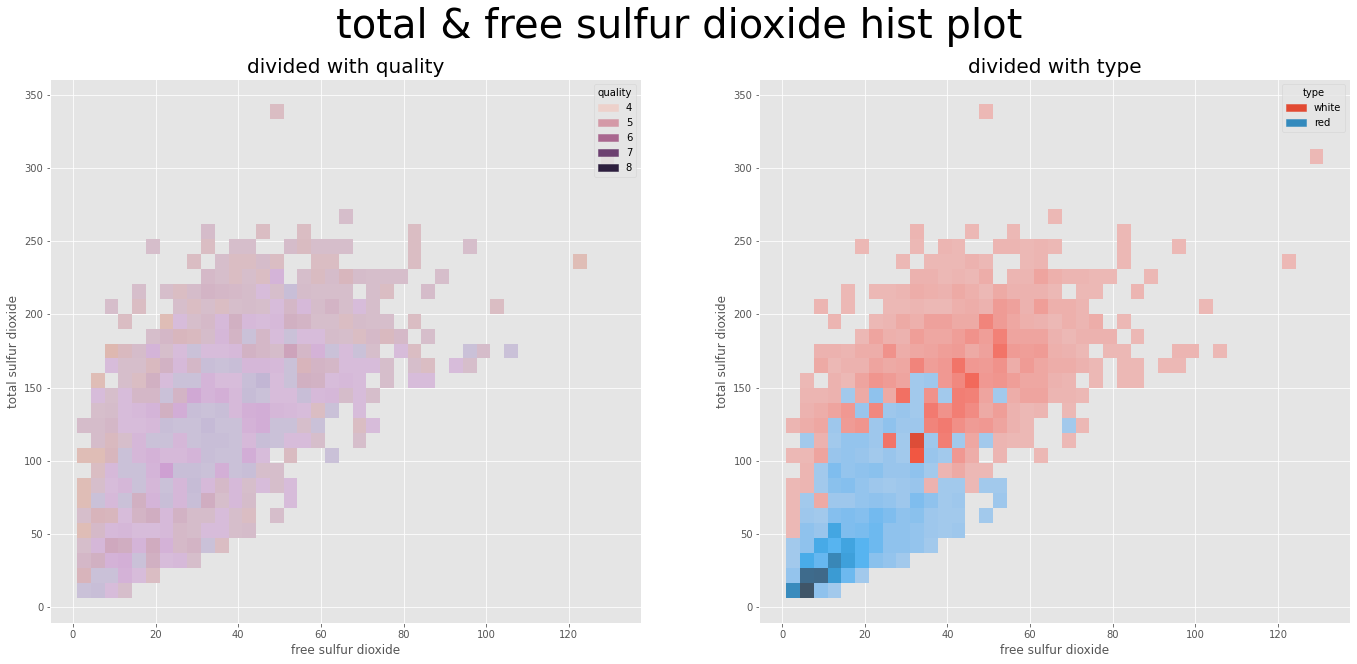

In [51]:
fig, axes = plt.subplots(1, 2, figsize = (2.33 * 10, 1*10))

for i, ax in enumerate(axes):
    if i == 0:
        sns.histplot(x = 'free sulfur dioxide', y='total sulfur dioxide', ax = ax, hue = 'quality', data = train_data)
    else:
        sns.histplot(x = 'free sulfur dioxide', y='total sulfur dioxide', ax = ax, hue = 'type', data = train_data)

axes[0].set_title('divided with quality', fontsize=20)
axes[1].set_title('divided with type', fontsize=20)
fig.suptitle('total & free sulfur dioxide hist plot', fontsize= 40)
plt.show()

In [12]:
def outliers(data, column):
    data_col = data[column]
    q1, q3 = np.percentile(data_col.values, [25,75])
    #넘파이의 값을 퍼센트로 표시
    iqr = q3 - q1
    lower_bound = q1 - (iqr*1.5)
    upper_bound = q3 + (iqr*1.5)
    outlier_index = data_col[(data_col > upper_bound)|(data_col<lower_bound)].index
    return outlier_index

In [15]:
sample = train_data.copy()
sample.drop('type', axis = 1, inplace = True)
sample.drop('quality', axis=1, inplace=True)
sample.drop('id', axis=1, inplace=True)

In [35]:
high_corr = abs(train_data.corr()['quality']).nlargest(5)

In [37]:
high_corr.index

Index(['quality', 'alcohol', 'density', 'volatile acidity', 'chlorides'], dtype='object')

In [21]:
sample.columns[0]

'fixed acidity'

In [42]:

high_list = high_corr.index[1:]

In [43]:

outlier_list = outliers(sample, high_list[0]) 
for i in high_list[1:]:
    tmp = outliers(sample, i)
    outlier_list = outlier_list.append(tmp)

In [44]:
outlier_list = outlier_list.unique()

In [45]:
len(outlier_list)

308

In [74]:
sample = train_data.copy()

In [75]:
sample.drop(index=outlier_list, inplace=True)

In [76]:
from sklearn.preprocessing import MinMaxScaler

In [77]:
x = sample.drop(['type', 'quality', 'id'], axis=1)
y = sample.quality

In [78]:
min_max = MinMaxScaler()
fitted_data = min_max.fit(x)
rs = min_max.transform(x)
rs = pd.DataFrame(rs, columns=x.columns, index=x.index.values)

In [84]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, shuffle=True, stratify=y)

In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [86]:
rf = RandomForestClassifier(random_state=100)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=100)

In [87]:
pred = rf.predict(x_test)
accuracy_score(y_test, pred)


0.6273504273504273

In [90]:
from sklearn.model_selection import GridSearchCV
params = {'max_depth' : range(5, 50), 'n_estimators' : range(10, 50),
'max_features' : ['auto', 'sqrt', 'log2']}

In [91]:
best_rf = GridSearchCV(RandomForestClassifier(random_state=100), params, cv=3, verbose=1)

In [92]:
best_rf = best_rf.fit(x_train, y_train)
print('best:', best_rf.best_params_)

Fitting 3 folds for each of 5400 candidates, totalling 16200 fits
best: {'max_depth': 13, 'max_features': 'auto', 'n_estimators': 44}


In [93]:
print('best_score: {:.4f}'.format(best_rf.best_score_))

best_score: 0.6172


In [96]:
rf_final = RandomForestClassifier(max_depth=13, n_estimators=44, n_jobs=-1)

In [98]:
rf_final.fit(x_train, y_train)


RandomForestClassifier(max_depth=13, n_estimators=44, n_jobs=-1)

In [100]:
pred = rf_final.predict(x_test)
accuracy_score(y_test, pred)

0.6273504273504273

In [101]:
rf_final.feature_importances_

array([0.07245065, 0.10010616, 0.08037132, 0.08558679, 0.08488418,
       0.08442814, 0.09034087, 0.1002229 , 0.07984942, 0.08452003,
       0.13723954])

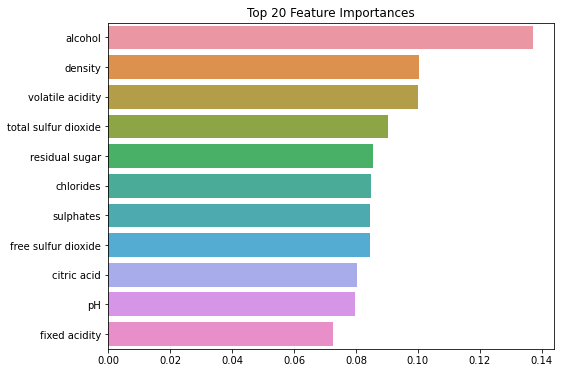

In [102]:
ftr_importances_values = rf_final.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr = ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(8,6))
plt.title('Top 20 Feature Importances')
sns.barplot(x=ftr, y=ftr.index)
plt.show()